# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

%matplotlib inline

# Data

In [2]:
wind = pd.read_csv('time_series_60min_singleindex.csv')
wind['utc_timestamp'] = pd.to_datetime(wind['utc_timestamp'])
wind = wind.set_index('utc_timestamp')

<AxesSubplot:xlabel='utc_timestamp'>

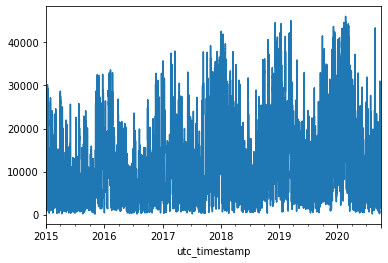

In [3]:
wind['DE_wind_generation_actual'].plot()

In [4]:
wind['year'] = wind.index.year

<font color='chocolate'> Break down to sepecific year </font>

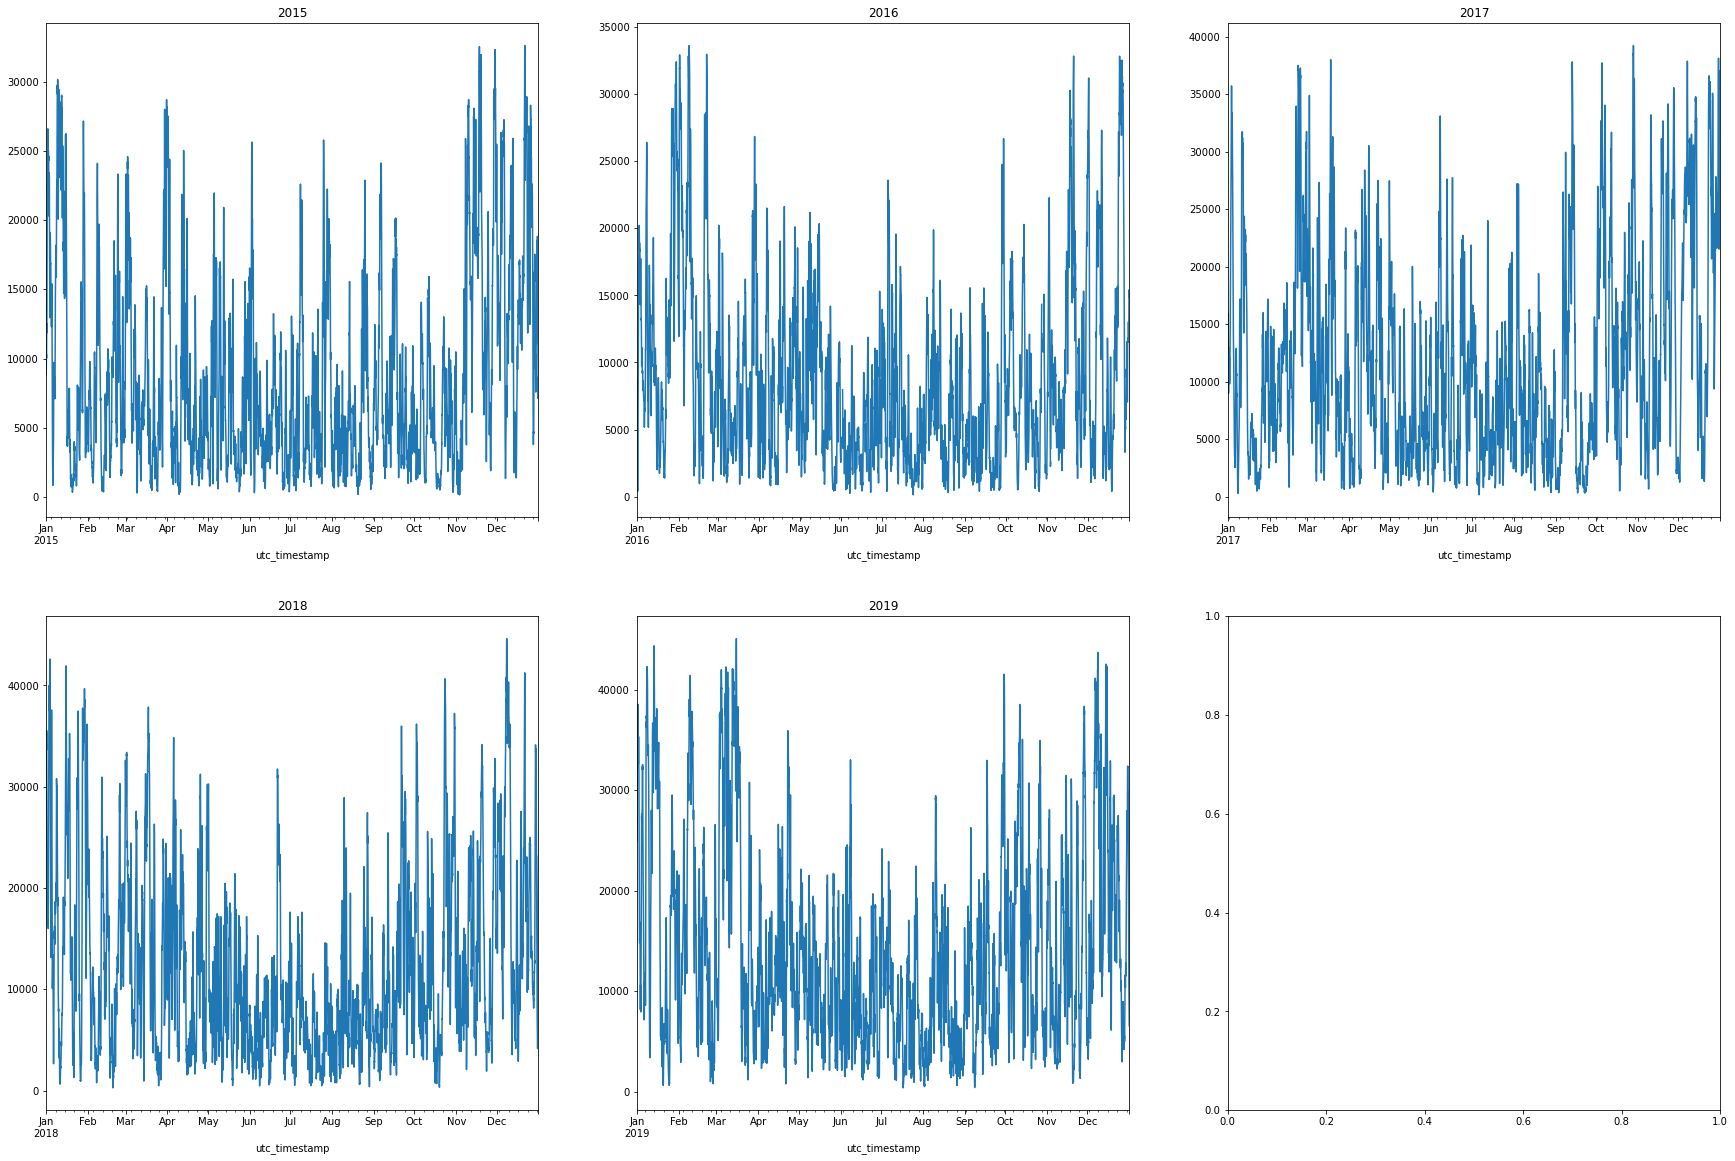

In [5]:
fig, axs = plt.subplots(2, 3, figsize = (30, 20))
a = 0
b = 0

for i in range(2015, 2020):
    wind.loc[wind.index.year==i, 'DE_wind_generation_actual'].plot(ax=axs[a%2, b%3])
    axs[a%2][b%3].set_title(i)
    if b >= 2:
        a = 1
    b+=1

In [6]:
wind.groupby(wind.index.year).mean().loc[2015:2019,:]['DE_wind_generation_actual']

utc_timestamp
2015     8809.621689
2016     8717.957979
2017    11720.431849
2018    12393.206849
2019    14132.633219
Name: DE_wind_generation_actual, dtype: float64

<font color='chocolate'> An increasing trend in wind generation</font>

### - Plant Info

In [7]:
# de_info = pd.read_csv('renewable_power_plants_DE.csv')

In [8]:
# de_info['commissioning_date'] = pd.to_datetime(de_info['commissioning_date'])
# de_info = de_info.set_index('commissioning_date')

In [9]:
# de_info = de_info.loc[(de_info.index.year == 2015) |
#                       (de_info.index.year == 2016) |
#                       (de_info.index.year == 2017) |
#                       (de_info.index.year == 2018) |
#                       (de_info.index.year == 2019), :]

In [10]:
# de_info = de_info[de_info['energy_source_level_2'] == 'Wind']

In [11]:
# de_info

### - Wind Speed & Weather Data
- with resolution of 1 hour

In [12]:
# weather = pd.read_csv('weather_data.csv')

In [13]:
# weather['utc_timestamp'] = pd.to_datetime(weather['utc_timestamp'])

# weather = weather.set_index('utc_timestamp')

<font color='chocolate'> Only care about 2015 - 2019 </font>

In [14]:
# weather = weather.loc[(weather.index.year == 2015) |
#                        (weather.index.year == 2016) |
#                        (weather.index.year == 2017) |
#                        (weather.index.year == 2018) |
#                        (weather.index.year == 2019), :]

<font color='chocolate'> Get German Data </font>

In [15]:
# weather.columns#[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']]

In [16]:
# wind['year']

In [17]:
df_2017 = pd.read_csv('weather_data_2017.csv', 
                      usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                      parse_dates=[0], index_col=0)

In [18]:
df_2017 = df_2017.loc[(df_2017.index.year == 2015) |
                       (df_2017.index.year == 2016) |
                       (df_2017.index.year == 2017) |
                       (df_2017.index.year == 2018) |
                       (df_2017.index.year == 2019), :]

In [19]:
df_2017

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE11_windspeed_10m,DE11_temperature,DE11_radiation_direct_horizontal,DE11_radiation_diffuse_horizontal,DE12_windspeed_10m,DE12_temperature,...,DEE0_radiation_direct_horizontal,DEE0_radiation_diffuse_horizontal,DEF0_windspeed_10m,DEF0_temperature,DEF0_radiation_direct_horizontal,DEF0_radiation_diffuse_horizontal,DEG0_windspeed_10m,DEG0_temperature,DEG0_radiation_direct_horizontal,DEG0_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,3.3706,-0.981,0.0,0.0,1.34,-3.06,0.0,0.0,1.12,-1.62,...,0.0,0.0,6.50,2.92,0.0,0.0,2.44,0.46,0.0,0.0
2015-01-01 01:00:00+00:00,3.4123,-1.035,0.0,0.0,1.28,-3.13,0.0,0.0,1.13,-1.71,...,0.0,0.0,6.61,2.91,0.0,0.0,2.54,0.43,0.0,0.0
2015-01-01 02:00:00+00:00,3.4766,-1.109,0.0,0.0,1.26,-3.19,0.0,0.0,1.14,-1.92,...,0.0,0.0,6.74,2.84,0.0,0.0,2.63,0.41,0.0,0.0
2015-01-01 03:00:00+00:00,3.4913,-1.166,0.0,0.0,1.22,-3.09,0.0,0.0,1.09,-1.94,...,0.0,0.0,6.88,2.73,0.0,0.0,2.58,0.32,0.0,0.0
2015-01-01 04:00:00+00:00,3.5389,-1.226,0.0,0.0,1.13,-2.97,0.0,0.0,1.02,-1.94,...,0.0,0.0,7.08,2.55,0.0,0.0,2.51,0.14,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,4.2129,-1.932,0.0,0.0,2.43,-3.61,0.0,0.0,2.09,-3.64,...,0.0,0.0,8.11,3.36,0.0,0.0,4.84,-5.11,0.0,0.0
2016-12-31 20:00:00+00:00,4.2875,-2.090,0.0,0.0,2.46,-4.07,0.0,0.0,2.27,-3.98,...,0.0,0.0,8.26,3.47,0.0,0.0,4.86,-5.49,0.0,0.0
2016-12-31 21:00:00+00:00,4.2965,-2.289,0.0,0.0,2.47,-4.57,0.0,0.0,2.30,-4.36,...,0.0,0.0,8.22,3.52,0.0,0.0,4.86,-5.80,0.0,0.0


In [20]:
der_2016 = pd.read_csv('weather_data_GER_2016.csv')

In [21]:
der_2016['timestamp'] = pd.to_datetime(der_2016['timestamp'])
der_2016 = der_2016.set_index('timestamp')

In [22]:
der_2016.head()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188
2016-01-01 03:00:00+00:00,3,47.5,5.625,0.96,1.35,1.62,2,10,0.052480,0.0,0.0,277.133240,1.247390,99314.773438
2016-01-01 04:00:00+00:00,4,47.5,5.625,1.14,1.56,1.83,2,10,0.052480,0.0,0.0,276.867767,1.248869,99324.796875


In [23]:
# der_2016.value_counts(['lat','lon'])

lat   lon   
47.5  5.625     8784
      6.250     8784
52.5  6.875     8784
      7.500     8784
      8.125     8784
                ... 
50.0  11.875    8784
      12.500    8784
      13.125    8784
      13.750    8784
55.0  15.000    8784
Length: 256, dtype: int64

In [24]:
X = der_2016.groupby('timestamp').mean()
X.head()

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000


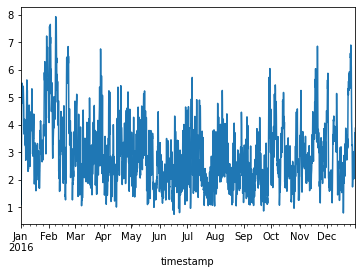

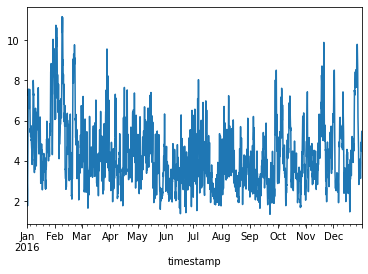

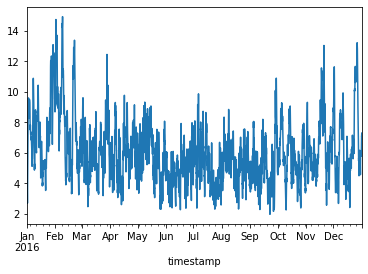

In [25]:
# X['v1'].plot()
# plt.show()
# X['v2'].plot()
# plt.show()
# X['v_50m'].plot()
# plt.show()

In [26]:
wind.loc[wind.index.year == 2016,:]['DE_wind_generation_actual']

utc_timestamp
2016-01-01 00:00:00+00:00     8579.0
2016-01-01 01:00:00+00:00     8542.0
2016-01-01 02:00:00+00:00     8443.0
2016-01-01 03:00:00+00:00     8295.0
2016-01-01 04:00:00+00:00     7319.0
                              ...   
2016-12-31 19:00:00+00:00    15303.0
2016-12-31 20:00:00+00:00    15354.0
2016-12-31 21:00:00+00:00    14847.0
2016-12-31 22:00:00+00:00    15056.0
2016-12-31 23:00:00+00:00    15422.0
Name: DE_wind_generation_actual, Length: 8784, dtype: float64

In [27]:
y = wind.loc[wind.index.year == 2016,:]['DE_wind_generation_actual']
y.shape

(8784,)

In [28]:
X.shape

(8784, 14)

In [29]:
df = pd.merge(y, X, left_index=True, right_index=True)
df.shape

(8784, 15)

In [30]:
df.columns

Index(['DE_wind_generation_actual', 'cumulated hours', 'lat', 'lon', 'v1',
       'v2', 'v_50m', 'h1', 'h2', 'z0', 'SWTDN', 'SWGDN', 'T', 'rho', 'p'],
      dtype='object')

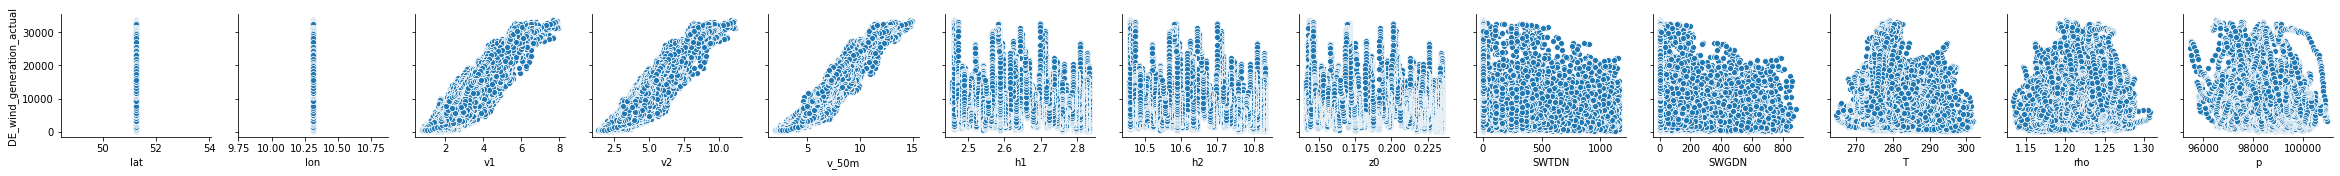

In [31]:
sns.pairplot(
    df,
    x_vars = ['lat', 'lon', 'v1', 'v2', 'v_50m',\
              'h1', 'h2', 'z0', 'SWTDN', 'SWGDN', 'T', 'rho', 'p'], 
    y_vars = 'DE_wind_generation_actual')

In [32]:
df = df.dropna()
X_wind = df[['v1', 'v2', 'v_50m']]
y_wind = df['DE_wind_generation_actual']

In [160]:
# import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# instantiate LinearRegression

lr_all = LinearRegression()
scores_wind = lr_all.fit(X_wind, y_wind)
# print(scores_wind, "\naverage =", np.mean(scores_wind))
lr_all.score(X_wind,
             y_wind)

0.9089054998064532

In [158]:
# plot lat log on german
y_wind

utc_timestamp
2016-01-01 00:00:00+00:00     8579.0
2016-01-01 01:00:00+00:00     8542.0
2016-01-01 02:00:00+00:00     8443.0
2016-01-01 03:00:00+00:00     8295.0
2016-01-01 04:00:00+00:00     7319.0
                              ...   
2016-12-31 19:00:00+00:00    15303.0
2016-12-31 20:00:00+00:00    15354.0
2016-12-31 21:00:00+00:00    14847.0
2016-12-31 22:00:00+00:00    15056.0
2016-12-31 23:00:00+00:00    15422.0
Name: DE_wind_generation_actual, Length: 8710, dtype: float64

In [35]:
att = pd.read_csv('weather_data_2018.csv')

In [36]:
# [col for col in att if col.startswith('DE')]

In [37]:
att['utc_timestamp'] =  pd.to_datetime(att['utc_timestamp'])

In [38]:
att = att.set_index('utc_timestamp')

In [39]:
att

,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,EE_temperature,EE_radiation_direct_horizontal,EE_radiation_diffuse_horizontal,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal,FI_temperature,...,LU_radiation_direct_horizontal,LU_radiation_diffuse_horizontal,NL_windspeed_10m,NL_temperature,NL_radiation_direct_horizontal,NL_radiation_diffuse_horizontal,PL_windspeed_10m,PL_temperature,PL_radiation_direct_horizontal,PL_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,4.664,0.0,0.0,-7.060,0.0,0.0,8.066,0.0,0.0,-6.254,...,0.0,0.0,7.52,2.382,0.0,0.0,3.57,-3.721,0.0,0.0
1980-01-01 01:00:00+00:00,4.052,0.0,0.0,-7.341,0.0,0.0,7.960,0.0,0.0,-6.232,...,0.0,0.0,7.28,2.236,0.0,0.0,3.50,-3.806,0.0,0.0
1980-01-01 02:00:00+00:00,3.581,0.0,0.0,-7.591,0.0,0.0,8.008,0.0,0.0,-6.343,...,0.0,0.0,6.95,2.086,0.0,0.0,3.49,-3.868,0.0,0.0
1980-01-01 03:00:00+00:00,3.197,0.0,0.0,-7.716,0.0,0.0,8.065,0.0,0.0,-6.550,...,0.0,0.0,6.52,1.861,0.0,0.0,3.47,-3.934,0.0,0.0
1980-01-01 04:00:00+00:00,2.750,0.0,0.0,-7.638,0.0,0.0,8.009,0.0,0.0,-6.722,...,0.0,0.0,6.26,1.713,0.0,0.0,3.34,-4.064,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,-7.295,0.0,0.0,3.661,0.0,0.0,6.615,0.0,0.0,1.411,...,0.0,0.0,6.88,1.805,0.0,0.0,5.68,-2.466,0.0,0.0
2016-12-31 20:00:00+00:00,-7.822,0.0,0.0,3.438,0.0,0.0,6.109,0.0,0.0,1.266,...,0.0,0.0,6.94,1.591,0.0,0.0,5.73,-2.663,0.0,0.0
2016-12-31 21:00:00+00:00,-8.376,0.0,0.0,3.363,0.0,0.0,5.639,0.0,0.0,1.007,...,0.0,0.0,7.11,1.461,0.0,0.0,5.74,-2.793,0.0,0.0


<AxesSubplot:xlabel='utc_timestamp'>

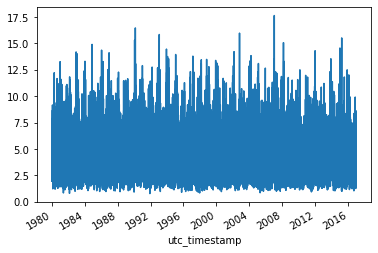

In [40]:
att['DE_windspeed_10m'].plot()

### Combine datasets

In [41]:
wind.loc[wind.index.year == 2015,:];

In [42]:
[i for i in wind.loc[wind.index.year == 2015,:].columns if 'BE' in i]

['BE_load_actual_entsoe_transparency',
 'BE_load_forecast_entsoe_transparency',
 'BE_solar_generation_actual',
 'BE_wind_generation_actual',
 'BE_wind_offshore_generation_actual',
 'BE_wind_onshore_generation_actual']

In [43]:
DE_2015 = pd.merge(att.loc[att.index.year == 2015, ['DE_windspeed_10m','DE_temperature']],
                   wind.loc[wind.index.year == 2015,:]['DE_wind_generation_actual'],
                   left_index=True, right_index=True)\
             .rename({'DE_windspeed_10m': 'ws',
                      'DE_temperature':'temp',
                      'DE_wind_generation_actual': 'actual_generation'}, axis = 1)

In [44]:
BE_2015 = pd.merge(att.loc[att.index.year == 2015, ['BE_windspeed_10m','BE_temperature']],
                   wind.loc[wind.index.year == 2015,:]['BE_wind_generation_actual'],
                   left_index=True, right_index=True)\
             .rename({'BE_windspeed_10m': 'ws',
                      'BE_temperature':'temp',
                      'BE_wind_generation_actual': 'actual_generation'}, axis = 1)

In [45]:
DE_2016 = pd.merge(att.loc[att.index.year == 2016, ['DE_windspeed_10m','DE_temperature']],
                   wind.loc[wind.index.year == 2016,:]['DE_wind_generation_actual'],
                   left_index=True, right_index=True)\
             .rename({'DE_windspeed_10m': 'ws',
                      'DE_temperature':'temp',
                      'DE_wind_generation_actual': 'actual_generation'}, axis = 1)

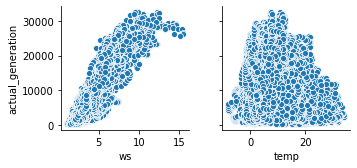

In [46]:
sns.pairplot(
    DE_2015,
    x_vars = ['ws', 'temp'], 
    y_vars = 'actual_generation');

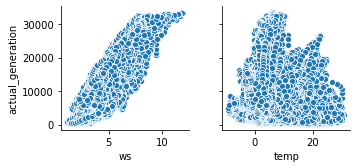

In [47]:
sns.pairplot(
    DE_2016,
    x_vars = ['ws', 'temp'], 
    y_vars = 'actual_generation');

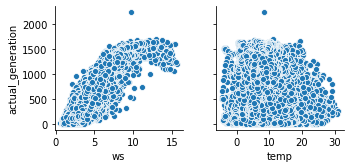

In [48]:
sns.pairplot(
    BE_2015,
    x_vars = ['ws', 'temp'], 
    y_vars = 'actual_generation');

In [49]:
DE_2015 = DE_2015.dropna()
DE_2016 = DE_2016.dropna()
BE_2015 = BE_2015.dropna()

# Data Engineering
- Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
for i in ['ws','temp']:
    scaler = StandardScaler()
    DE_2015[i] = scaler.fit_transform(DE_2015[[i]])
    scaler = StandardScaler()
    DE_2016[i] = scaler.fit_transform(DE_2016[[i]])
    scaler = StandardScaler()
    BE_2015[i] = scaler.fit_transform(BE_2015[[i]])



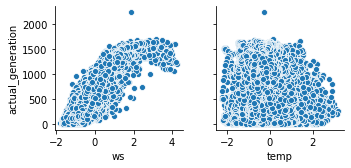

In [52]:
sns.pairplot(
    BE_2015,
    x_vars = ['ws', 'temp'], 
    y_vars = 'actual_generation');

# Prediction!

In [53]:
from sklearn.metrics import mean_squared_error # built-in RMSE/MSE function

### Linear Regression

In [228]:
# BE_2015

In [54]:
DE_2015_lr = LinearRegression()
DE_2015_lr.fit(X=DE_2015[['ws', 'temp']],
               y=DE_2015['actual_generation'])

LinearRegression()

In [55]:
DE_2015_lr.score(DE_2015[['ws', 'temp']],
                 DE_2015['actual_generation'])

0.7791246769845415

In [56]:
mean_squared_error(DE_2015['actual_generation'],
                   DE_2015_lr.predict(DE_2015[['ws', 'temp']]),
                   squared=False)

3344.6221853250117

In [177]:
r2 = DE_2015_lr.score(DE_2016[['ws', 'temp']],
                     DE_2016['actual_generation'])
r2

0.7549455298694694

In [58]:
mean_squared_error(DE_2016['actual_generation'],
                   DE_2015_lr.predict(DE_2016[['ws', 'temp']]),
                   squared=False)

3389.446288719017

In [59]:
DE_2015_lr.score(BE_2015[['ws', 'temp']],
                 BE_2015['actual_generation'])

-477.6710424955862

A negative 𝑅2 means that the model fitted your data extremely bad. Since 𝑅2 compares the fit of the model with that of the null hypothesis( a horizontal straight line ), then 𝑅2 is negative when the model fits worse than a horizontal line.

In [60]:
mean_squared_error(BE_2015['actual_generation'],
                   DE_2015_lr.predict(BE_2015[['ws', 'temp']]),
                   squared=False)

10069.895277567382

In [172]:
# DE_2016[['ws', 'temp']]

In [183]:
DE_2016[['ws', 'temp']].values.reshape(-1,1).shape , DE_2016['actual_generation'].shape

((17420, 1), (8710,))

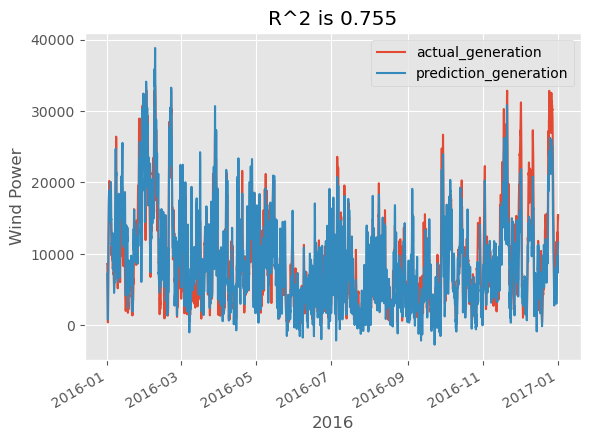

In [212]:
DE_2016['actual_generation'].plot()
pd.Series(DE_2015_lr.predict(DE_2016[['ws', 'temp']]), 
          index = DE_2016.index,
          name = 'prediction_generation').plot()
plt.xlabel('2016')
plt.ylabel('Wind Power')
plt.title('R^2 is 0.755')
plt.legend();

### Pol Regression

In [61]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [62]:
#initialize
kfold = KFold(3, shuffle=True, random_state=1)
kfold

KFold(n_splits=3, random_state=1, shuffle=True)

In [63]:
errs_df = pd.DataFrame()
train_errs = []
val_errs = []

for d in range(1, 16):
    errs = []
    train_err = []
    for train, val in kfold.split(DE_2015):
        # Separate the data into a training set and validation set
        data_train, data_val = DE_2015.iloc[train], DE_2015.iloc[val]
        
        # Fit the model on the training set
        pl = Pipeline([('poly', PolynomialFeatures(d)),
                       ('lin-reg', LinearRegression())])
        
        pl.fit(data_train[['ws', 'temp']], 
               data_train['actual_generation'])
        
        # Compute the model's validation error
        val_err = mean_squared_error(data_val['actual_generation'],
                                     pl.predict(data_val[['ws','temp']]),
                                     squared=False)
        errs.append(val_err)
        
        # train/test error
        train_err_1 = mean_squared_error(data_train['actual_generation'],
                                         pl.predict(data_train[['ws','temp']]),
                                         squared=False)
        train_err.append(train_err_1)

    errs_df[f'Deg {d}'] = errs
    train_errs.append(np.mean(train_err))
    val_errs.append(np.mean(errs))
    
errs_df.index = [f'Fold {i}' for i in range(1, 4)]

In [64]:
errs_df

,Deg 1,Deg 2,Deg 3,Deg 4,Deg 5,Deg 6,Deg 7,Deg 8,Deg 9,Deg 10,Deg 11,Deg 12,Deg 13,Deg 14,Deg 15
Fold 1,3303.239681,3190.490369,3033.901528,3008.750577,2992.516197,2977.964752,2973.550672,2964.687186,2970.273484,2959.154728,2971.880424,2952.192099,3023.732374,3085.737714,7463.108613
Fold 2,3385.279527,3257.084998,3109.392733,3070.427489,3063.147550,3040.878638,3041.834078,3030.359925,3022.897102,3023.019356,3028.114728,3025.880874,3022.381631,3025.084648,3072.101831
Fold 3,3349.408689,3204.995747,3060.144437,3023.223517,3013.176110,2988.000280,2983.428814,2960.770910,2955.452940,2947.946210,2947.704819,2944.238379,2948.989906,2962.135662,3243.381587


In [166]:
errs_df.mean()

Alpha 0    2974.071489
Alpha 1    2974.484902
Alpha 2    2972.887382
Alpha 3    2972.151305
Alpha 4    2972.048897
Alpha 5    2972.346839
Alpha 6    2972.907988
Alpha 7    2973.649300
Alpha 8    2974.516962
Alpha 9    2975.473910
dtype: float64

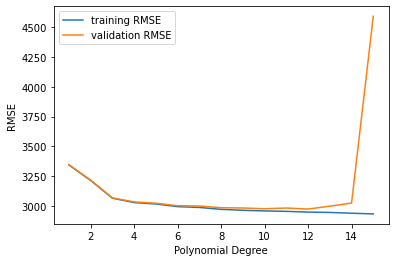

In [66]:
plt.plot(range(1, 16), train_errs, label='training RMSE')
plt.plot(range(1, 16), val_errs, label='validation RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend();

#### -  Try polynomial = 12
- test it with test data

In [67]:
pl_12 = Pipeline([('poly', PolynomialFeatures(12)), ('lin-reg', LinearRegression())])
pl_12.fit(DE_2015[['ws', 'temp']], 
          DE_2015['actual_generation'])

Pipeline(steps=[('poly', PolynomialFeatures(degree=12)),
                ('lin-reg', LinearRegression())])

#### - compare with test (2016) data

In [68]:
mean_squared_error(DE_2015['actual_generation'],
                   pl_12.predict(DE_2015[['ws','temp']]),
                   squared=False)

2952.3022616212575

In [69]:
pl_12.score(X = DE_2015[['ws','temp']],
            y = DE_2015['actual_generation'])

0.8279024436467911

In [70]:
mean_squared_error(DE_2016['actual_generation'],
                   pl_12.predict(DE_2016[['ws','temp']]),
                   squared=False)

3540.8210866188147

In [71]:
pl_12.score(X = DE_2016[['ws','temp']],
            y = DE_2016['actual_generation'])

0.7325681783905784

#### -  Try polynomial = 3

In [72]:
pl_3 = Pipeline([('poly', PolynomialFeatures(3)),
                  ('lin-reg', LinearRegression())])

pl_3.fit(DE_2015[['ws', 'temp']], 
          DE_2015['actual_generation'])  

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('lin-reg', LinearRegression())])

In [73]:
mean_squared_error(DE_2015['actual_generation'],
                   pl_3.predict(DE_2015[['ws','temp']]),
                   squared=False)

3065.787502778916

In [74]:
pl_3.score(X = DE_2015[['ws','temp']],
            y = DE_2015['actual_generation'])

0.8144174386579449

In [75]:
mean_squared_error(DE_2016['actual_generation'],
                   pl_3.predict(DE_2016[['ws','temp']]),
                   squared=False)

3423.409377810419

In [201]:
mean_squared_error(BE_2015['actual_generation'],
                   pl_3.predict(BE_2015[['ws','temp']]),
                   squared=False)

10329.569208002233

In [202]:
pl_3.score(X = BE_2015[['ws','temp']],
           y = BE_2015['actual_generation'])

-502.6764746940821

In [225]:
# fig, [ax1, ax2] = plt.subplots(1,2)

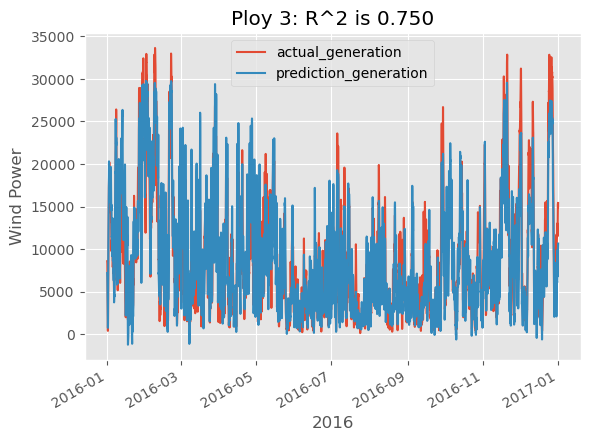

In [211]:
DE_2016['actual_generation'].plot()
pd.Series(pl_3.predict(DE_2016[['ws', 'temp']]), 
          index = DE_2016.index,
          name = 'prediction_generation').plot()
plt.xlabel('2016')
plt.ylabel('Wind Power')
plt.title('Ploy 3: R^2 is 0.750')
plt.legend();

### Regularization!

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [78]:
#initialize
kfold = KFold(3, shuffle=True, random_state=1)
kfold

KFold(n_splits=3, random_state=1, shuffle=True)

In [79]:
errs_df = pd.DataFrame()
train_errs = []
val_errs = []

for i in range(0, 10):
    errs = []
    train_err = []
    for train, val in kfold.split(DE_2015):
        # Separate the data into a training set and validation set
        data_train, data_val = DE_2015.iloc[train], DE_2015.iloc[val]
        
        pl =  Pipeline([('poly', PolynomialFeatures(3)),
                        ('Ridge-reg', Ridge(i))])
        
        pl.fit(data_train[['ws', 'temp']], 
               data_train['actual_generation'])
        
        # Compute the model's validation error
        val_err = mean_squared_error(data_val['actual_generation'],
                                     pl.predict(data_val[['ws',
                                                          'temp']]),
                                     squared=False)
        errs.append(val_err)
        
        # train/test error
        train_err_1 = mean_squared_error(data_train['actual_generation'],
                                         pl.predict(data_train[['ws',
                                                                'temp']]),
                                         squared=False)
        train_err.append(train_err_1)

    errs_df[f'Alpha {i}'] = errs
    train_errs.append(np.mean(train_err))
    val_errs.append(np.mean(errs))
    
errs_df.index = [f'Fold {i}' for i in range(1, 4)]

In [80]:
errs_df.mean().idxmin()

'Alpha 2'

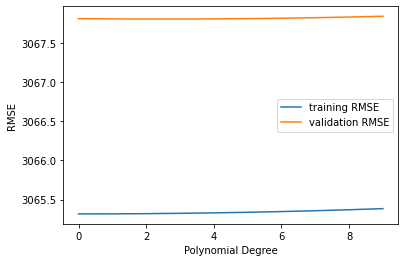

In [81]:
plt.plot(range(0, 10), train_errs, label='training RMSE')
plt.plot(range(0, 10), val_errs, label='validation RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend();

In [82]:
errs_df = pd.DataFrame()
train_errs = []
val_errs = []

for i in range(0, 10):
    errs = []
    train_err = []
    for train, val in kfold.split(DE_2015):
        # Separate the data into a training set and validation set
        data_train, data_val = DE_2015.iloc[train], DE_2015.iloc[val]
        
        pl =  Pipeline([('poly', PolynomialFeatures(12)),
                        ('Ridge-reg', Ridge(i))])
        
        pl.fit(data_train[['ws', 'temp']], 
               data_train['actual_generation'])
        
        # Compute the model's validation error
        val_err = mean_squared_error(data_val['actual_generation'],
                                     pl.predict(data_val[['ws',
                                                          'temp']]),
                                     squared=False)
        errs.append(val_err)
        
        # train/test error
        train_err_1 = mean_squared_error(data_train['actual_generation'],
                                         pl.predict(data_train[['ws',
                                                                'temp']]),
                                         squared=False)
        train_err.append(train_err_1)

    errs_df[f'Alpha {i}'] = errs
    train_errs.append(np.mean(train_err))
    val_errs.append(np.mean(errs))
    
errs_df.index = [f'Fold {i}' for i in range(1, 4)]

/Users/apple/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.41299e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/apple/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.62051e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/apple/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.61265e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/apple/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.82598e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=

In [83]:
errs_df.mean().idxmin()

'Alpha 4'

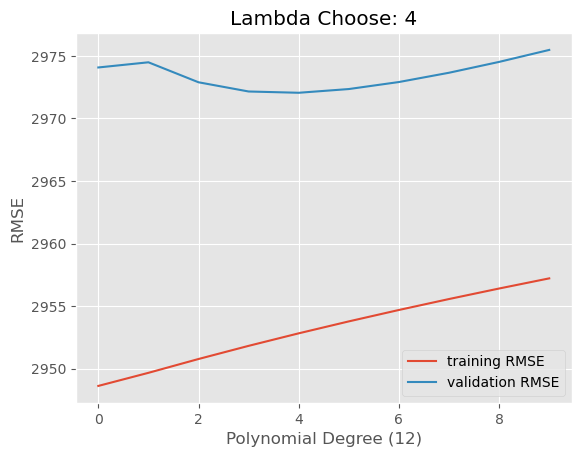

In [215]:
plt.plot(range(0, 10), train_errs, label='training RMSE')
plt.plot(range(0, 10), val_errs, label='validation RMSE')
plt.xlabel('Polynomial Degree (12)')
plt.ylabel('RMSE')
plt.title('Lambda Choose: 4')
plt.legend();

In [216]:
# plt.plot(range(0, 10), train_errs, label='training RMSE')
# plt.plot(range(0, 10), val_errs, label='validation RMSE')
# plt.xlabel('Polynomial Degree')
# plt.ylabel('RMSE')
# plt.ylabel('RMSE')
# plt.legend();

In [94]:
pl_12_rid = Pipeline([('Poly', PolynomialFeatures(12)), 
                      ('Ridge-reg', Ridge(4))])

pl_12_rid.fit(DE_2015[['ws', 'temp']], 
              DE_2015['actual_generation'])

/Users/apple/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.68496e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Pipeline(steps=[('Poly', PolynomialFeatures(degree=12)),
                ('Ridge-reg', Ridge(alpha=4))])

In [95]:
pl_12_rid.score(X = DE_2015[['ws','temp']],
                y = DE_2015['actual_generation'])

0.8276184448208844

In [96]:
mean_squared_error(DE_2015['actual_generation'],
                   pl_12_rid.predict(DE_2015[['ws','temp']]),
                   squared=False)

2954.7372315650737

In [103]:
pl_12_rid.score(X = DE_2016[['ws','temp']],
                y = DE_2016['actual_generation'])

0.733818397533444

In [98]:
mean_squared_error(DE_2016['actual_generation'],
                   pl_12_rid.predict(DE_2016[['ws','temp']]),
                   squared=False)

3532.5348846826205

In [99]:
pl_3_rid = Pipeline([('Poly', PolynomialFeatures(3)), 
                      ('Ridge-reg', Ridge(2))])

pl_3_rid.fit(DE_2016[['ws', 'temp']], 
             DE_2016['actual_generation'])

Pipeline(steps=[('Poly', PolynomialFeatures(degree=3)),
                ('Ridge-reg', Ridge(alpha=2))])

In [100]:
pl_3_rid.score(X = DE_2015[['ws','temp']],
               y = DE_2015['actual_generation'])

0.792492004048686

In [104]:
mean_squared_error(DE_2015['actual_generation'],
                   pl_3_rid.predict(DE_2015[['ws','temp']]),
                   squared=False)

3241.8348407968297

In [105]:
pl_3_rid.score(X = DE_2016[['ws','temp']],
               y = DE_2016['actual_generation'])

0.7702929323136057

!!!!!!Good!!!!!!

In [107]:
mean_squared_error(DE_2016['actual_generation'],
                   pl_3_rid.predict(DE_2016[['ws','temp']]),
                   squared=False)

3281.5922745294997

In [241]:
DE_2015

,ws,temp,actual_generation
utc_timestamp,,,
2015-01-01 00:00:00+00:00,-0.489949,-1.399713,8852.0
2015-01-01 01:00:00+00:00,-0.468462,-1.406737,9054.0
2015-01-01 02:00:00+00:00,-0.435331,-1.416361,9070.0
2015-01-01 03:00:00+00:00,-0.427756,-1.423774,9163.0
2015-01-01 04:00:00+00:00,-0.403229,-1.431578,9231.0
...,...,...,...
2015-12-31 19:00:00+00:00,-0.427035,-0.997185,7334.0
2015-12-31 20:00:00+00:00,-0.425540,-0.984570,7092.0
2015-12-31 21:00:00+00:00,-0.452437,-0.977027,7389.0


In [246]:
# DE_2016.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='utc_timestamp', length=8710)

In [251]:
pl_3_rid.predict(
    DE_2016.loc[DE_2016.index.month == 1,['ws', 'temp']]
)

array([ 7140.20557042,  7063.40936985,  6933.22487149,  6769.95912876,
        6395.14164688,  5903.79034583,  5389.6011817 ,  4785.89962994,
        4701.669551  ,  4698.12312344,  4152.02354848,  3582.64891335,
        3128.44874852,  2560.49817414,  2072.36303266,  2568.60172466,
        3964.73894292,  5316.55463157,  6441.98685294,  7500.45057848,
        8360.28940673,  9007.75393259,  9866.46073625, 10651.95210716,
       11468.78399128, 12389.17238174, 13269.23647588, 13897.07882287,
       14639.09785516, 15518.21484476, 15989.96745477, 16666.70700583,
       17686.09486122, 18604.69923867, 19087.65458179, 19082.61363983,
       18674.73784439, 17912.17050722, 17064.46858199, 16799.12956253,
       17026.13077178, 16883.47991325, 16473.04045328, 16169.28826211,
       15837.74289699, 15663.71992618, 15557.79411321, 15520.92206962,
       15533.56763572, 15446.99074884, 15384.96012504, 15698.70424292,
       15882.62707562, 15738.84076608, 15493.70740813, 15342.39572775,
      

In [242]:
pl_3_rid.predict(DE_2016[['ws', 'temp']])

array([ 7140.20557042,  7063.40936985,  6933.22487149, ...,
       10234.06353375, 10698.76918315, 10830.37969659])

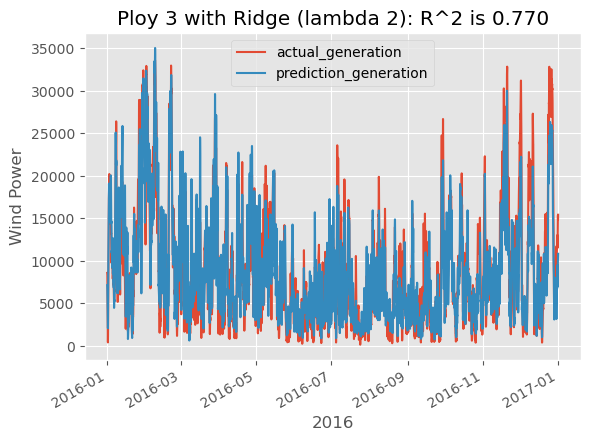

In [221]:
DE_2016['actual_generation'].plot()
pd.Series(pl_3_rid.predict(DE_2016[['ws', 'temp']]), 
          index = DE_2016.index,
          name = 'prediction_generation').plot()
plt.xlabel('2016')
plt.ylabel('Wind Power')
plt.title('Ploy 3 with Ridge (lambda 2): R^2 is 0.770')
plt.legend();

### Decision Tree

In [126]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [130]:
DE_2015[['ws','temp']]
DE_2015['actual_generation'];

In [131]:
dt_no_max = DecisionTreeRegressor()
dt_no_max.fit(DE_2015[['ws','temp']], DE_2015['actual_generation'])

DecisionTreeRegressor()

In [156]:
dt_no_max.score(DE_2015[['ws','temp']],
                DE_2015['actual_generation'])

1.0

In [133]:
dt_no_max.tree_.max_depth

36

In [155]:
dt_no_max.score(DE_2016[['ws','temp']],
                DE_2016['actual_generation'])

0.5560249695712713

In [122]:
?dt_no_max.score

In [143]:
hyperparameters = {
    'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, 25, None], 
    'min_samples_split': [2, 3, 5, 7, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 5, 7, 10, 15, 20],
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],
    'max_features': ['auto','sqrt','log2'],
    'ccp_alpha': [0,1,2,3,4]
}

In [144]:
searcher = GridSearchCV(DecisionTreeRegressor(), hyperparameters, cv=3)

In [145]:
%%time
searcher.fit(DE_2015[['ws','temp']], DE_2015['actual_generation'])

CPU times: user 15min 4s, sys: 5.82 s, total: 15min 9s
Wall time: 15min 19s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0, 1, 2, 3, 4],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, 25, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 10, 15, 20],
                         'min_samples_split': [2, 3, 5, 7, 10, 15, 20]})

In [222]:
searcher.best_params_

{'ccp_alpha': 3,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [150]:
pd.DataFrame(np.vstack([searcher.cv_results_[f'split{i}_test_score'] for i in range(3)]))

,0,1,2,3,4,5,6,7,8,9,...,27710,27711,27712,27713,27714,27715,27716,27717,27718,27719
0,0.772777,0.772777,0.772777,0.772777,0.772777,0.772777,0.772777,0.772777,0.772777,0.772777,...,0.392278,0.309751,0.235374,0.332347,0.370196,0.346575,0.264379,0.377211,0.302787,0.449325
1,0.478117,0.478117,0.478117,0.478117,0.478117,0.478117,0.478117,0.478117,0.478117,0.478117,...,0.048407,0.345621,0.016038,0.127143,0.064292,0.421328,0.073403,0.068527,0.418022,0.423019
2,0.615447,0.615447,0.615447,0.615447,0.615447,0.615447,0.615447,0.615447,0.615447,0.615447,...,0.391333,0.445790,0.526471,0.401312,0.471862,0.503514,0.541461,0.482690,0.512658,0.554155


In [151]:
searcher.score(DE_2015[['ws','temp']], 
               DE_2015['actual_generation'])

(0.809672221987568,)

In [152]:
mean_squared_error(DE_2015['actual_generation'],
                   searcher.predict(DE_2015[['ws','temp']]),
                   squared=False)

3104.7351324913325

In [153]:
searcher.score(DE_2016[['ws','temp']], 
               DE_2016['actual_generation'])

(0.7244844737290073,)

In [154]:
mean_squared_error(DE_2016['actual_generation'],
                   searcher.predict(DE_2016[['ws','temp']]),
                   squared=False)

3593.9371717982503

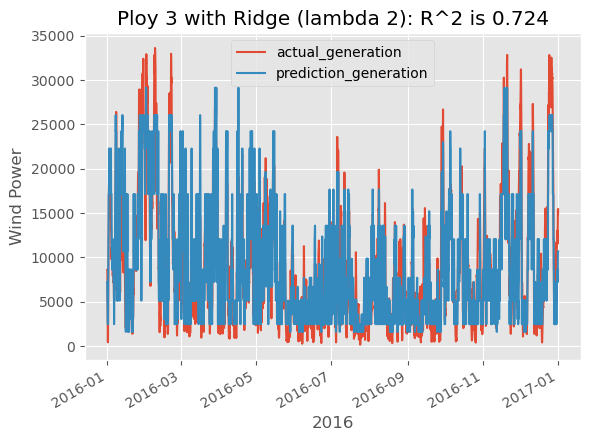

In [224]:
DE_2016['actual_generation'].plot()
pd.Series(searcher.predict(DE_2016[['ws', 'temp']]), 
          index = DE_2016.index,
          name = 'prediction_generation').plot()
plt.xlabel('2016')
plt.ylabel('Wind Power')
plt.title('Ploy 3 with Ridge (lambda 2): R^2 is 0.724')
plt.legend();

In [165]:
# plot_tree(dt_no_max, feature_names=DE_2015.columns[:-1])

In [236]:
# from netCDF4 import Dataset
# import cartopy.crs as ccrs

In [237]:
# data = Dataset('MERRA2_400.tavg1_2d_slv_Nx.20210101.nc4', mode='r')
# data

In [ ]:
# lons = data.variables['lon'][:]
# lats = data.variables['lat'][:]
# T2M = data.variables['T2M'][:,:,:]
# T2M = T2M[0,:,:]

In [ ]:
# fig = plt.figure(figsize=(8,4))
# ax = plt.axes(projection=ccrs.Robinson())
# ax.set_global()
# ax.coastlines(resolution="110m",linewidth=1)
# ax.gridlines(linestyle='--',color='black')

# clevs = np.arange(230,311,5)
# plt.contourf(lons, lats, T2M, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
# plt.title('MERRA-2 Air Temperature at 2m, January 2010', size=14)
# cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
# cb.set_label('K',size=12,rotation=0,labelpad=15)
# cb.ax.tick_params(labelsize=10)

In [ ]:
# data.variables.keys()

In [ ]:
# data.variables['time'][:]

In [239]:
# import xarray as xr

In [238]:
# %%time
# df = xr.open_dataset('MERRA2_400.tavg1_2d_slv_Nx.20210101.nc4').to_dataframe()
# df

In [ ]:
# ds = xr.open_dataset('MERRA2_400.tavg1_2d_slv_Nx.20210101.nc4')
# # ds.where(ds.lon == der_2016['lat'].values)
# ds.where(ds.lon == 47.5)

In [ ]:
# der_2016['lat']